In [43]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import xlrd 
from scipy import stats

In [3]:
#reading the csv files 

cab_data = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
cust_id = pd.read_csv("Customer_ID.csv")
trans_id = pd.read_csv("Transaction_ID.csv")

# 1. CAB Dataset

In [5]:
print("\n Cab Dataset\n", cab_data.head())


 Cab Dataset
    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [6]:
print("\n Cab Dataset info\n")
cab_data.info()


 Cab Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [7]:
#column names

cab_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [8]:
#unique values in categorical columns

print(cab_data['Company'].unique())
print(cab_data['City'].unique())

['Pink Cab' 'Yellow Cab']
['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


In [12]:
print("\n Cab Dataset shape :", cab_data.shape)


 Cab Dataset shape : (359392, 7)


In [13]:
#describe cab dataset

cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [14]:
#checking for missing values

print("\n Missing values in Cab Dataset \n",cab_data.isnull().sum())


 Missing values in Cab Dataset 
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


There are no missing values in cab dataset

# 2. City Dataset

In [15]:
print("\n City Dataset \n",city.head())


 City Dataset 
              City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 


In [16]:
print("\n City Dataset info\n")
city.info()


 City Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [17]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,SEATTLE WA,"814,885","302,149"
freq,1,1,1


In [18]:
city.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [19]:
print("\n City Dataset shape :", city.shape)


 City Dataset shape : (20, 3)


In [20]:
print("\n Missing values in City Dataset \n",city.isnull().sum())


 Missing values in City Dataset 
 City          0
Population    0
Users         0
dtype: int64


There are no missing values in city dataset

In [21]:
#converting Users and Population into numeric in City Dataset

city['Users'] = city['Users'].replace(",","", regex=True).astype(int)
city['Population'] = city['Population'].replace(",","", regex=True).astype(int)
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


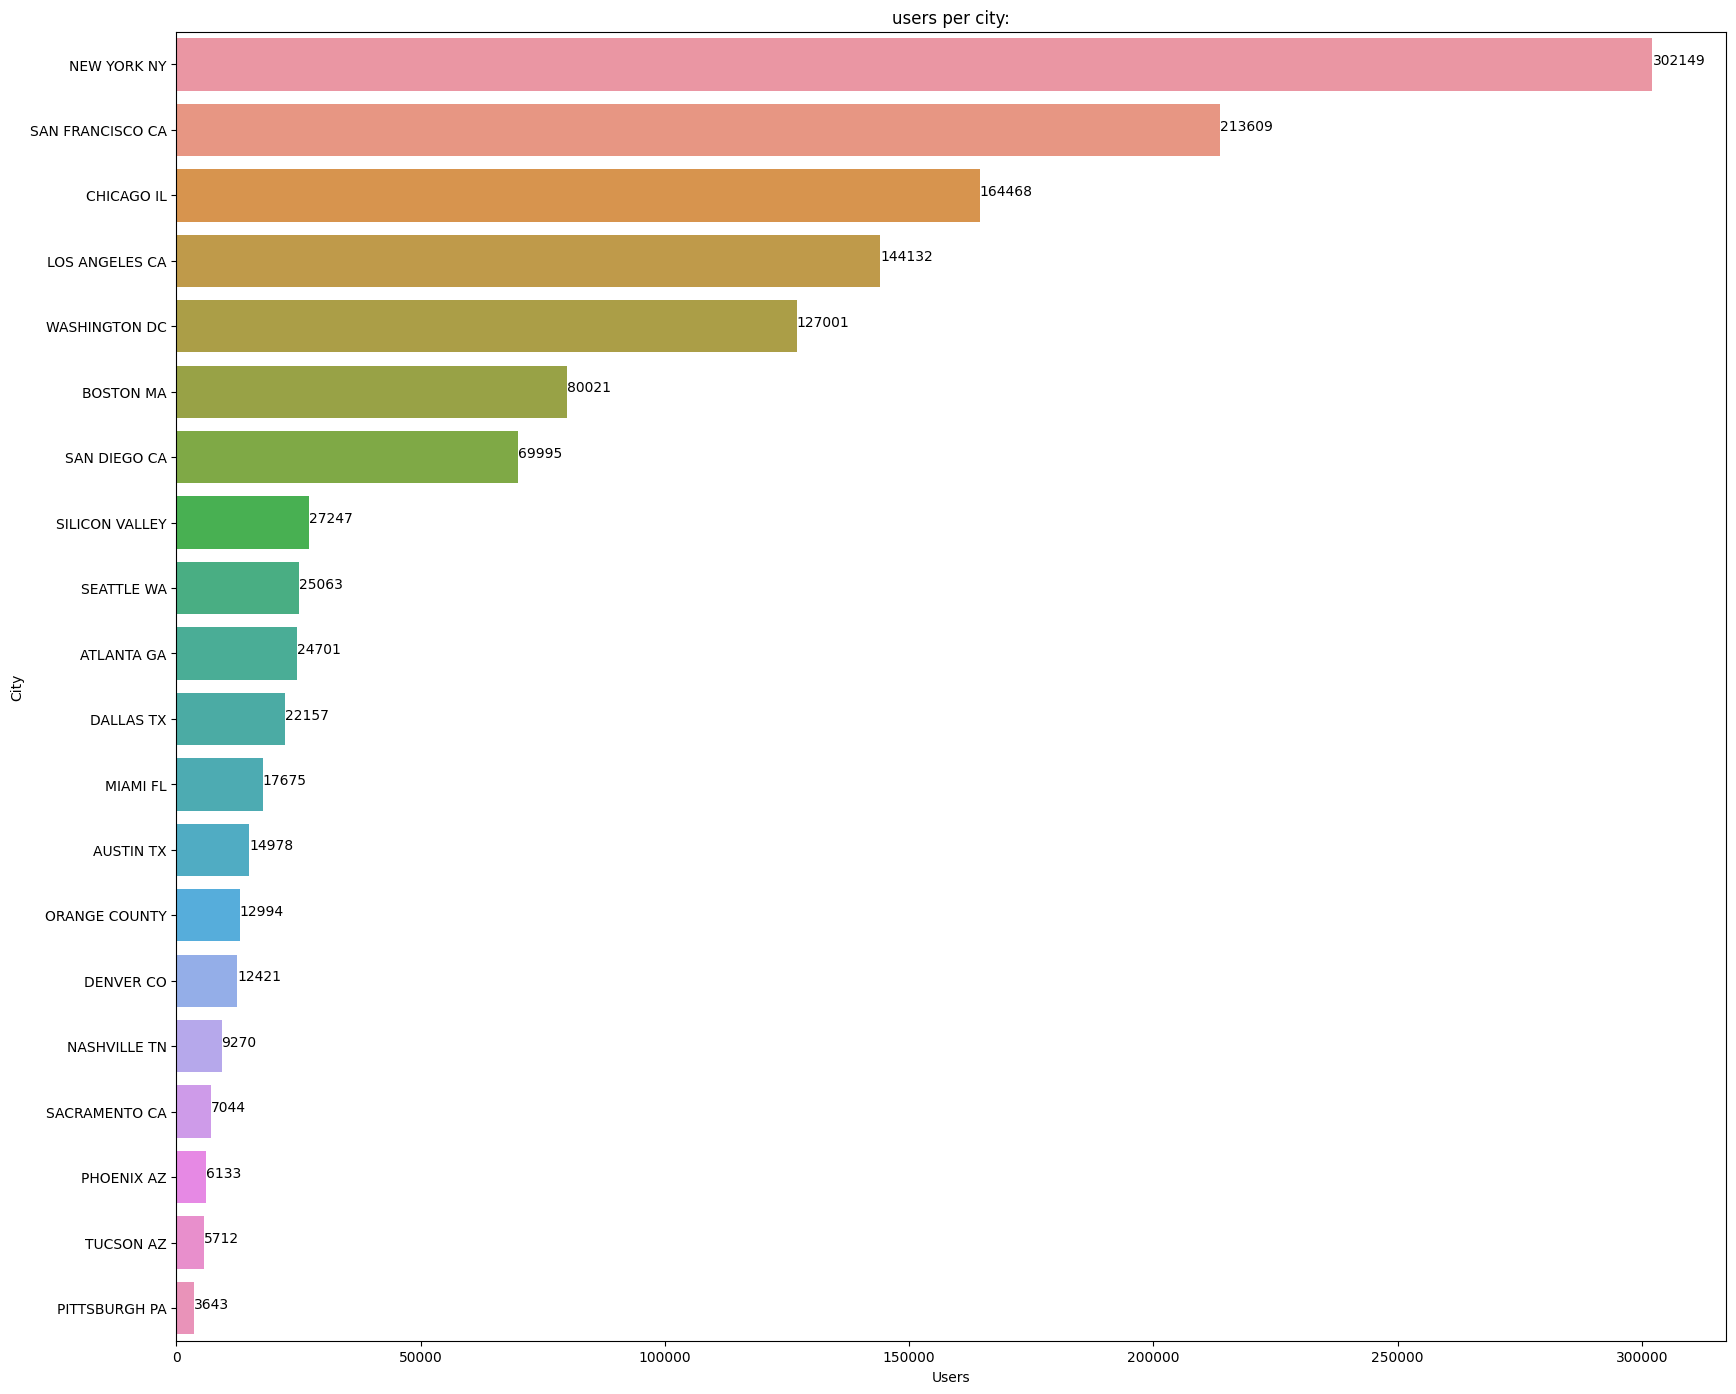

In [22]:
# checking users per city
users_per_city=pd.DataFrame(city.groupby("City")["Users"].sum().sort_values(ascending=False))
users_per_city.reset_index(inplace=True)

plt.figure(figsize=(20, 17));
g=sb.barplot(x="Users", y="City", data=users_per_city);
for i, v in enumerate(users_per_city.Users):
    g.text(v, i, str(int(v)))
plt.title('users per city:');


<AxesSubplot:title={'center':' USER PRESENCE CITY WISE'}, ylabel='Users'>

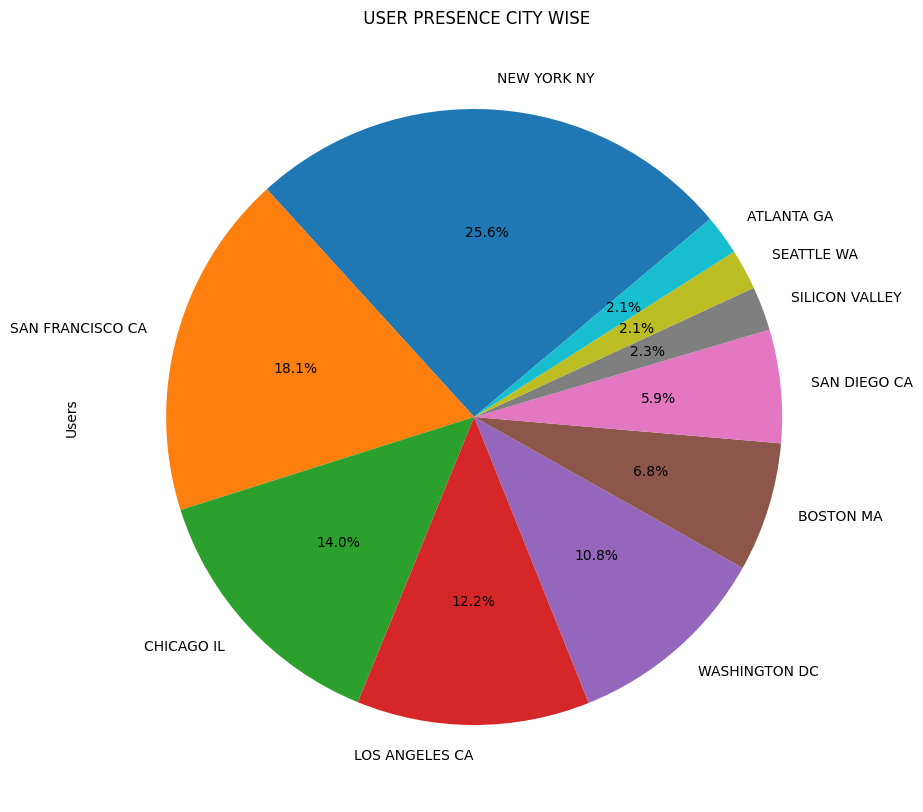

In [23]:
# top 10 cities by users
plt.title(" USER PRESENCE CITY WISE")
city.groupby("City")["Users"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,figsize=(15,10),autopct='%1.1f%%')


New York has the maximum number of users followed by San Fransisco, Chicago, Los Angeles and so on

# 3. Customer Dataset

In [24]:
print("\n Customer Dataset \n",cust_id.head())


 Customer Dataset 
    Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536


In [25]:
print("\n Customer Dataset info\n")
cust_id.info()


 Customer Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [26]:
print("\n Customer Dataset shape :", cust_id.shape)


 Customer Dataset shape : (49171, 4)


In [27]:
cust_id.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [28]:
cust_id['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
cust_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [30]:
print("\n Missing values in Customer Dataset \n",cust_id.isnull().sum())


 Missing values in Customer Dataset 
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


There are no missing values in customer dataset

# 4. Transaction Dataset

In [31]:
print("\n Transaction Dataset \n", trans_id.head())


 Transaction Dataset 
    Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card


In [32]:
print("\n Transaction Dataset info\n") 
trans_id.info()


 Transaction Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [33]:

print("\n Transcation Dataset shape :", trans_id.shape)


 Transcation Dataset shape : (440098, 3)


In [34]:
print("\n Missing values in Transaction Dataset \n",trans_id.isnull().sum())


 Missing values in Transaction Dataset 
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


There are no missing values in transaction dataset

In [35]:
trans_id.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [36]:
trans_id.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [37]:
trans_id['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

# Creating a master dataset 

In [38]:
#merging all datasets into a single data set

master_data = cab_data.merge(trans_id, on= 'Transaction ID').merge(
    cust_id, on ='Customer ID').merge(city, on = 'City')

master_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001


In [39]:
#checking for duplicate rows

duplicated = master_data[master_data.duplicated()]
print(duplicated)
print(duplicated.shape[0])

Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Customer ID, Payment_Mode, Gender, Age, Income (USD/Month), Population, Users]
Index: []
0


In [40]:
#number of rows and columns in master dataset

master_data.shape

(359392, 14)

In [41]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users'],
      dtype='object')

In [42]:
print("Merged Cab data info") 
master_data.info()

Merged Cab data info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int32  
 13  Users               359392 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(4)
memory usage: 38.4

In [44]:
# changing the Ms excel serial number into real Date

master_data['Date of Travel1'] = master_data['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
master_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date of Travel1
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016-01-08
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018-07-21
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018-11-23
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016-01-06
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,2018-03-03
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,2018-04-13
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,2018-07-06
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,2018-08-02


In [45]:
master_data['Travel_year']=pd.DatetimeIndex(master_data['Date of Travel1']).year
master_data['Travel_month']=pd.DatetimeIndex(master_data['Date of Travel1']).month
master_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date of Travel1,Travel_year,Travel_month
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016-01-08,2016,1
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018-07-21,2018,7
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018-11-23,2018,11
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016-01-06,2016,1
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018-04-21,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,2018-03-03,2018,3
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,2018-04-13,2018,4
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,2018-07-06,2018,7
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,2018-08-02,2018,8


In [46]:
#checking unique values of Company

print(master_data.Company.unique())
print(master_data.Company.value_counts())

['Pink Cab' 'Yellow Cab']
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


# FEATURE ANALYSIS 

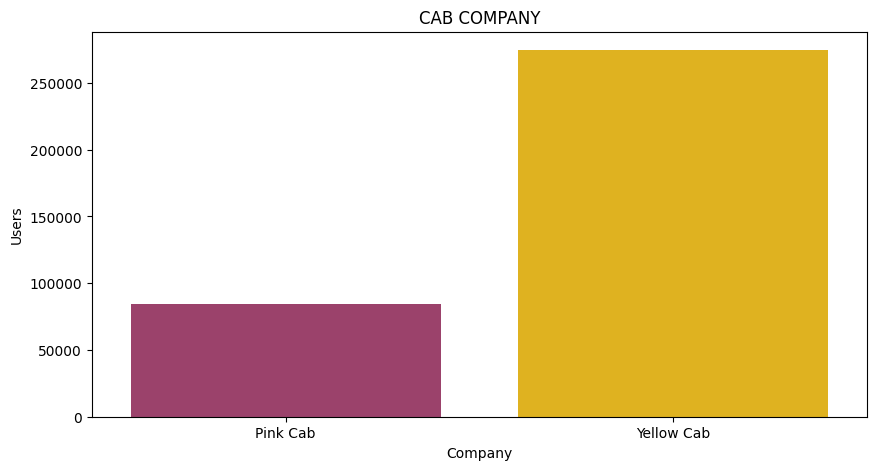

In [47]:
#plotting number of users of pink and yellow company 

plt.figure(figsize=(10,5))
sb.countplot(data = master_data, x='Company', palette=['#AA336A', '#FFC300'])
plt.title('CAB COMPANY')
plt.xlabel('Company')
plt.ylabel('Users')
plt.show()

It can be seen that, number of yellow cab users are more than pink cab

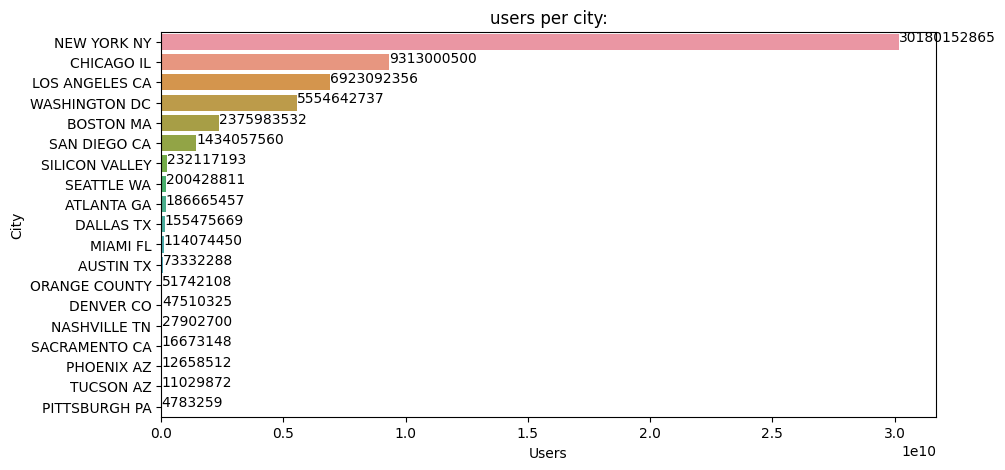

In [48]:
# checking users per city
users_per_city=pd.DataFrame(master_data.groupby("City")["Users"].sum().sort_values(ascending=False))
users_per_city.reset_index(inplace=True)

plt.figure(figsize=(10, 5));
g=sb.barplot(x="Users", y="City", data=users_per_city);
for i, v in enumerate(users_per_city.Users):
    g.text(v, i, str(int(v)))
plt.title('users per city:');


In [49]:
# let's split the dataset into Pink Cab and Yellow Cab

PinkCab = master_data[master_data['Company']=='Pink Cab']
YellowCab = master_data[master_data['Company']=='Yellow Cab']


In [50]:
PinkCab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date of Travel1,Travel_year,Travel_month
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,2016-01-08,2016,1
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,2016-01-06,2016,1
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,814885,24701,2018-10-27,2018,10
7,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701,2016-01-02,2016,1
11,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701,2016-01-07,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359332,10200082,42939,Pink Cab,WASHINGTON DC,20.23,347.58,218.484,52425,Cash,Male,58,10737,418859,127001,2017-07-23,2017,7
359346,10262863,43058,Pink Cab,WASHINGTON DC,4.44,61.95,50.616,51257,Card,Male,39,15247,418859,127001,2017-11-19,2017,11
359356,10417014,43436,Pink Cab,WASHINGTON DC,40.95,565.07,434.070,51257,Card,Male,39,15247,418859,127001,2018-12-02,2018,12
359358,10197277,42939,Pink Cab,WASHINGTON DC,32.64,375.27,368.832,51510,Card,Female,18,6855,418859,127001,2017-07-23,2017,7


In [51]:
YellowCab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date of Travel1,Travel_year,Travel_month
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018-07-21,2018,7
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018-11-23,2018,11
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018-04-21,2018,4
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701,2018-05-04,2018,5
8,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701,2016-09-21,2016,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,2018-03-03,2018,3
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,2018-04-13,2018,4
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,2018-07-06,2018,7
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,2018-08-02,2018,8


Text(0, 0.5, 'Frequency')

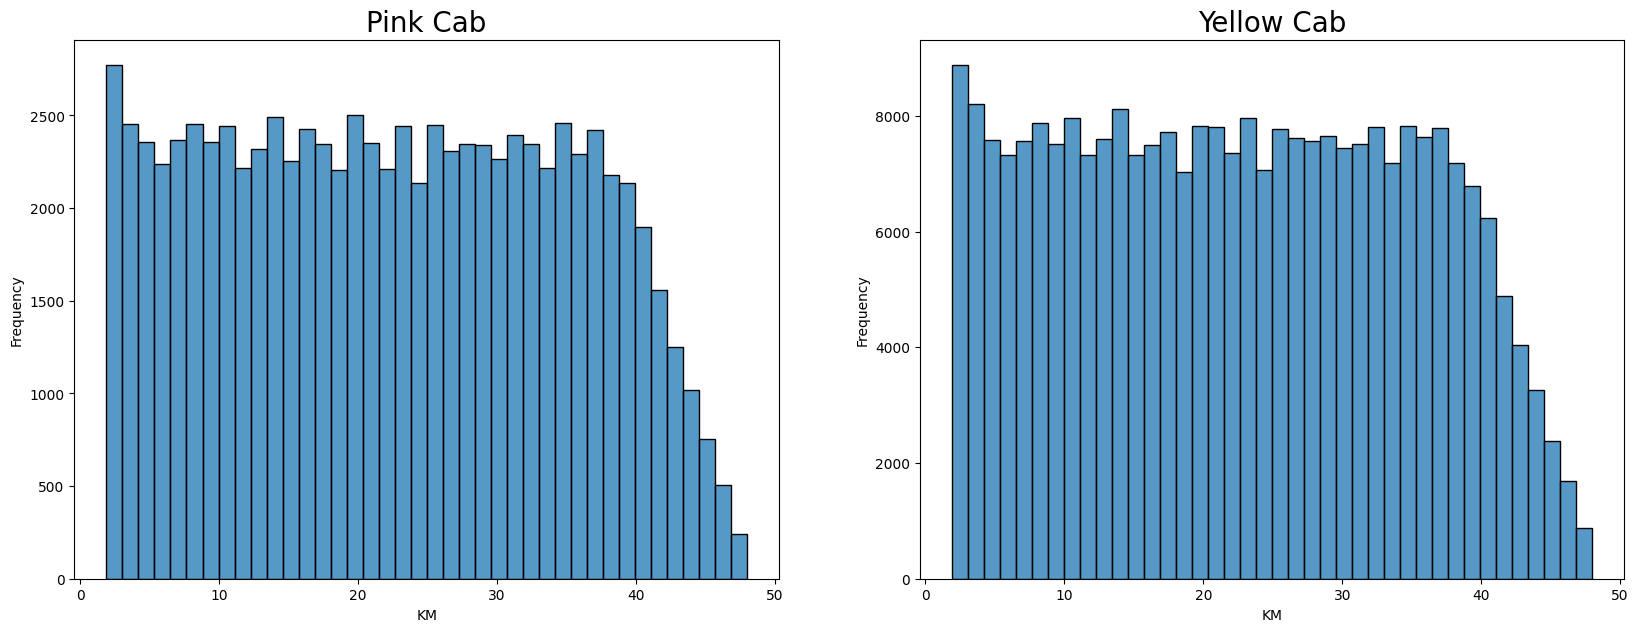

In [52]:
#number of KM travelled in both cabs

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sb.histplot(data=PinkCab, x='KM Travelled', bins=40, ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
ax1.set_xlabel('KM')
ax1.set_ylabel('Frequency')
sb.histplot(data=YellowCab, x='KM Travelled', bins=40, ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
ax2.set_xlabel('KM')
ax2.set_ylabel('Frequency')

YELLOW cab has travelled more kms than PINK cab

Text(0, 0.5, 'Frequency')

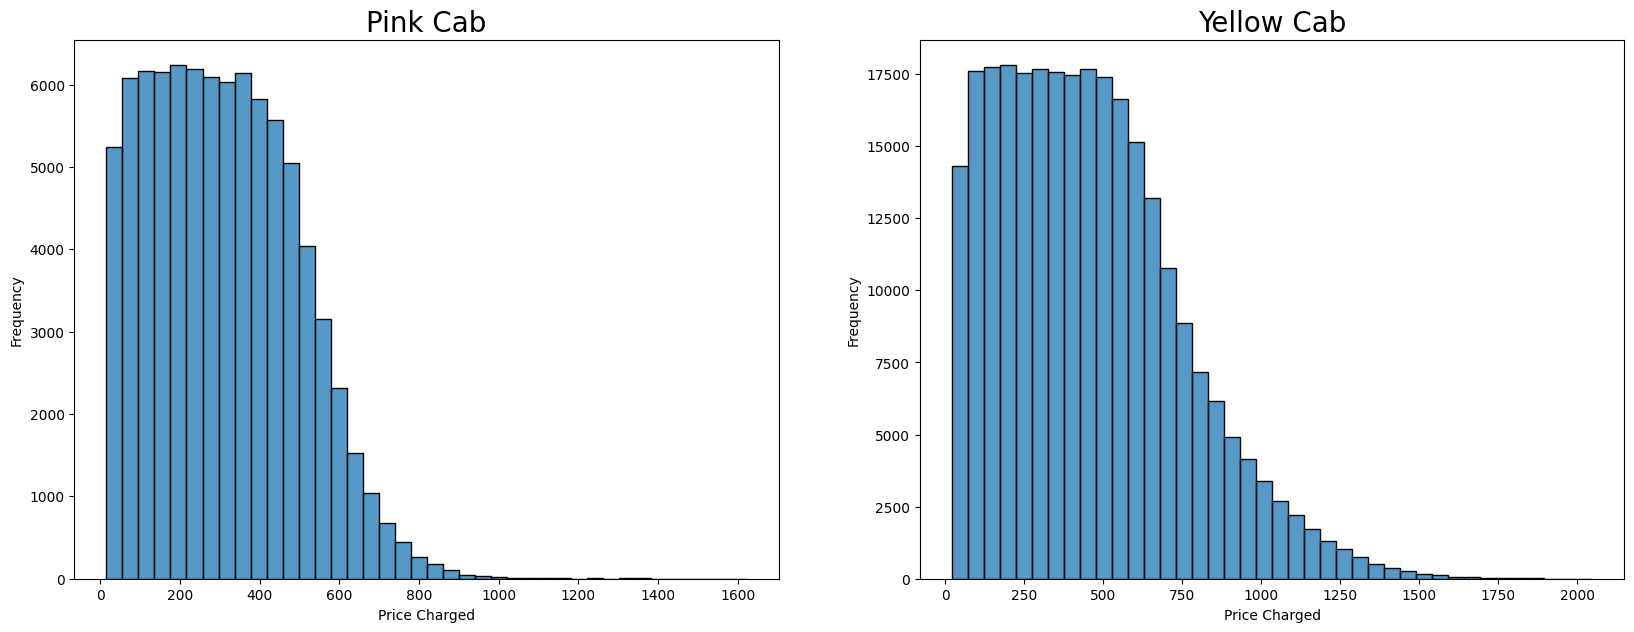

In [53]:
#Price charged in both cabs

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sb.histplot(data=PinkCab, x='Price Charged', bins=40, ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
ax1.set_xlabel('Price Charged')
ax1.set_ylabel('Frequency')
sb.histplot(data=YellowCab, x='Price Charged', bins=40, ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
ax2.set_xlabel('Price Charged')
ax2.set_ylabel('Frequency')

Price charged per trip is more for YELLOW cab compared to PINK cab

Text(0, 0.5, 'Frequency')

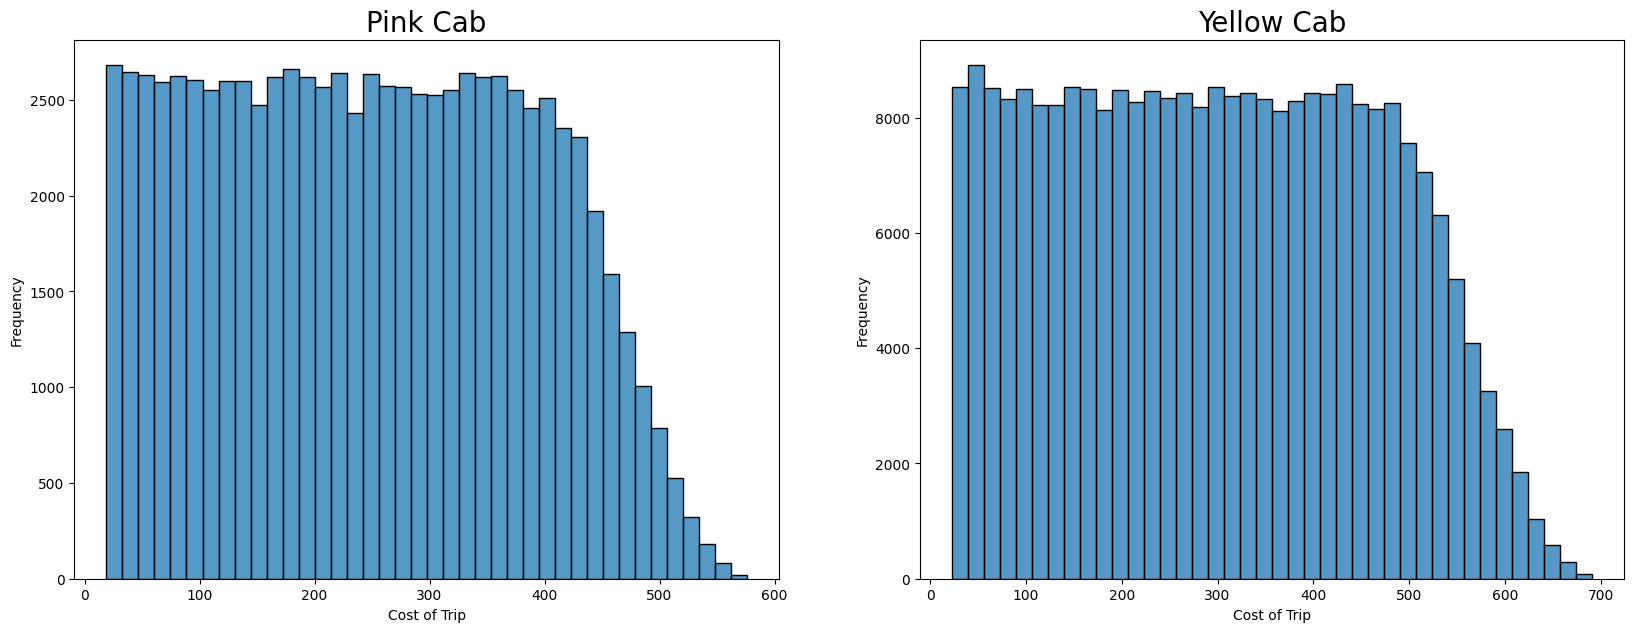

In [54]:
#Cost of trip in both cabs

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sb.histplot(data=PinkCab, x='Cost of Trip', bins=40, ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
ax1.set_xlabel('Cost of Trip')
ax1.set_ylabel('Frequency')
sb.histplot(data=YellowCab, x='Cost of Trip', bins=40, ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
ax2.set_xlabel('Cost of Trip')
ax2.set_ylabel('Frequency')

Cost per trip is more for YELLOW cab compared to PINK cab

Text(0, 0.5, 'Frequency')

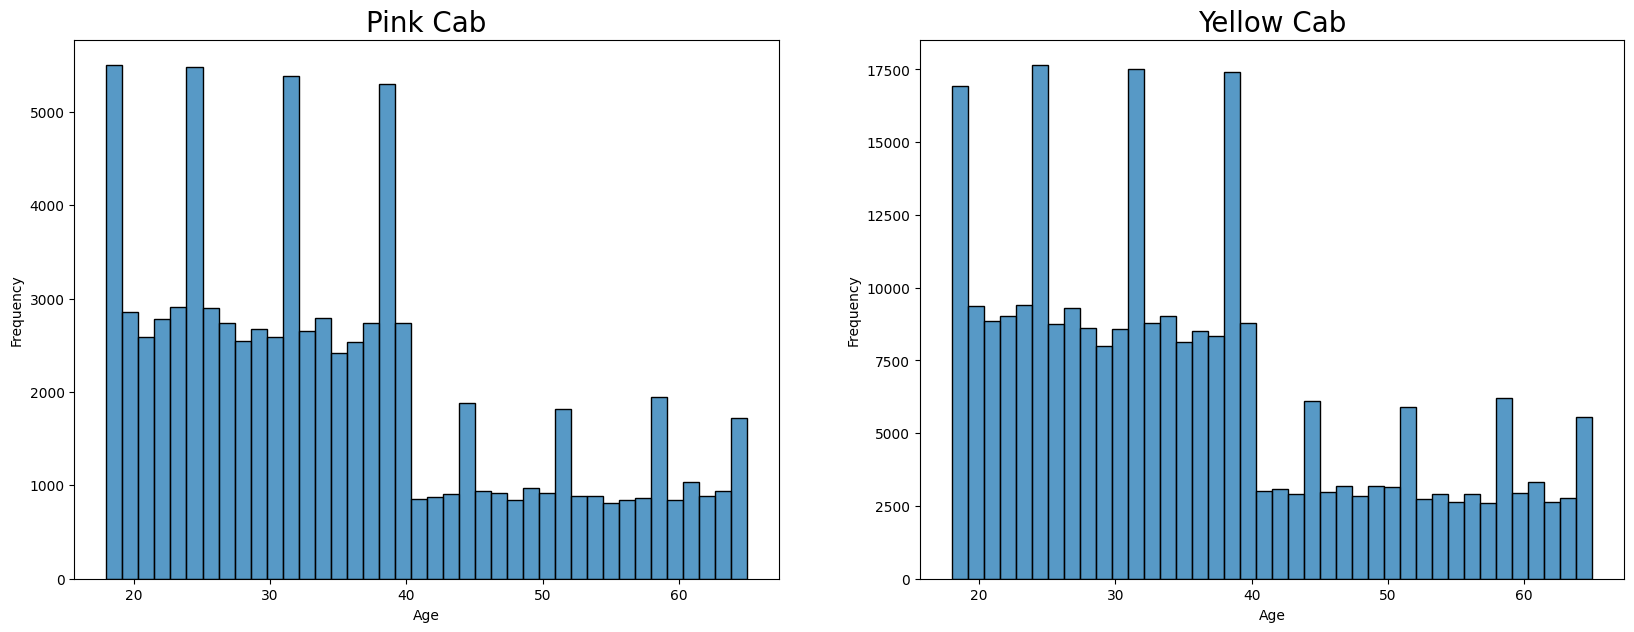

In [172]:
#Age range of users in both cabs

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sb.histplot(data=PinkCab, x='Age', bins=40, ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
sb.histplot(data=YellowCab, x='Age', bins=40, ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')

Both cab has travellers in all age ranges 

Text(0, 0.5, 'Frequency')

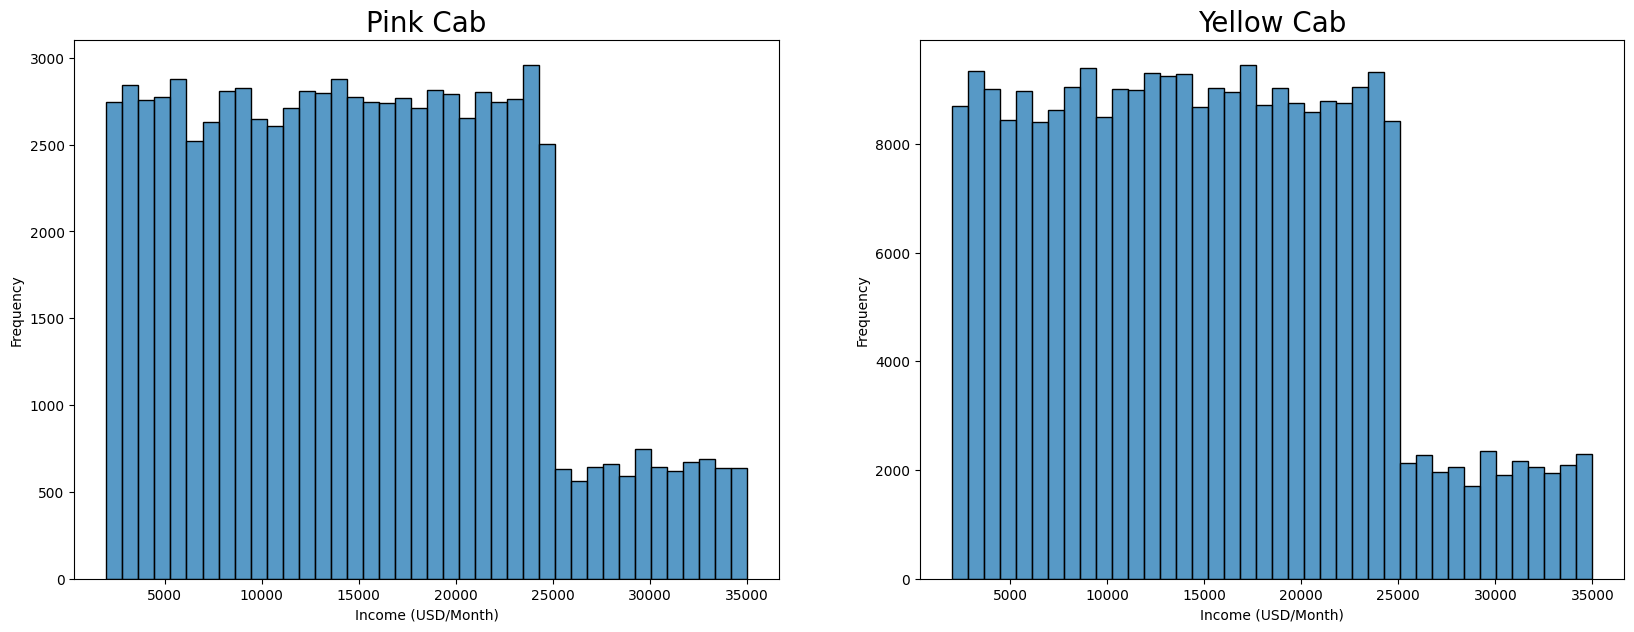

In [173]:
#Income (USD/Month) range of users in both cabs

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sb.histplot(data=PinkCab, x='Income (USD/Month)', bins=40, ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
ax1.set_xlabel('Income (USD/Month)')
ax1.set_ylabel('Frequency')
sb.histplot(data=YellowCab, x='Income (USD/Month)', bins=40, ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
ax2.set_xlabel('Income (USD/Month)')
ax2.set_ylabel('Frequency')

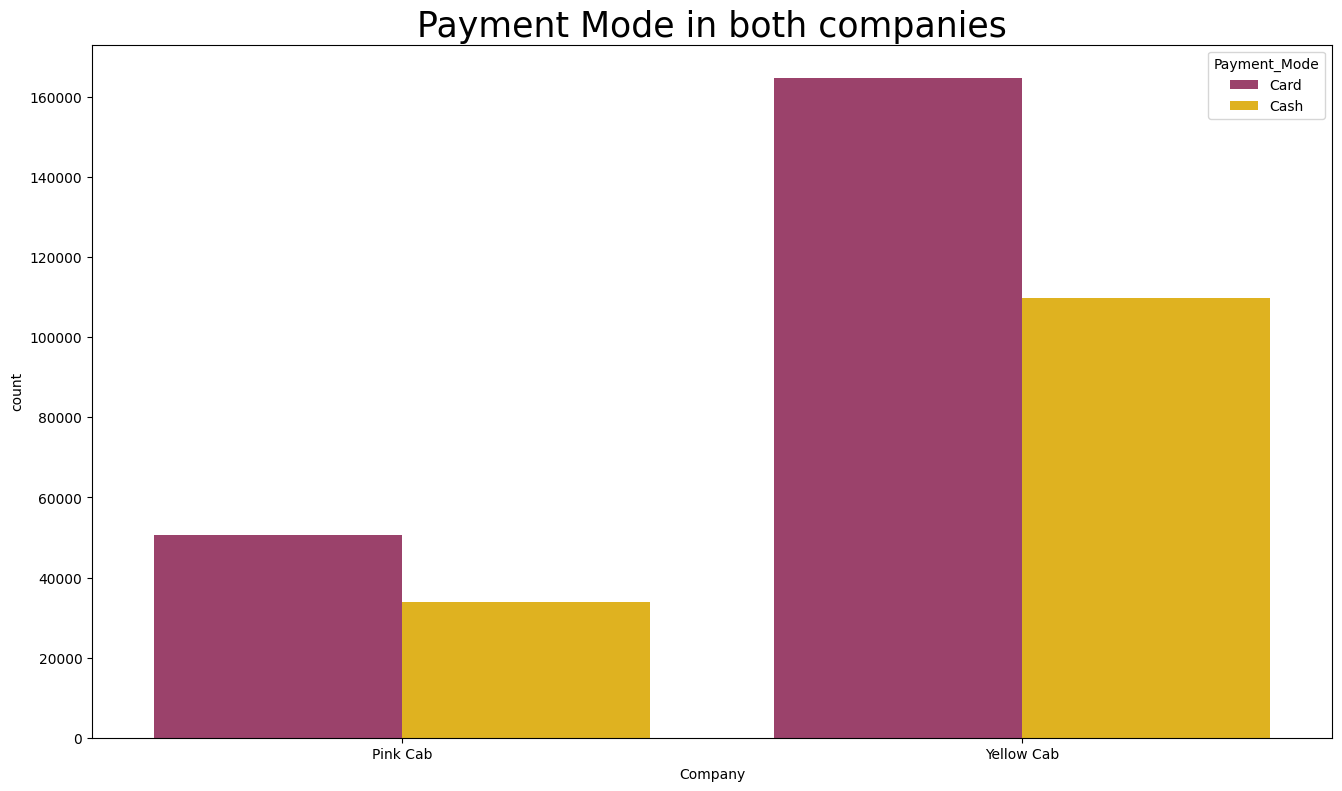

In [55]:
#comparing two modes of payments

plt.figure(figsize = (16, 9))
ax = sb.countplot(x="Company", hue="Payment_Mode", data=master_data, palette=['#AA336A', '#FFC300'])
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

In both companies Card has been used as the mode of payment compared to Cash

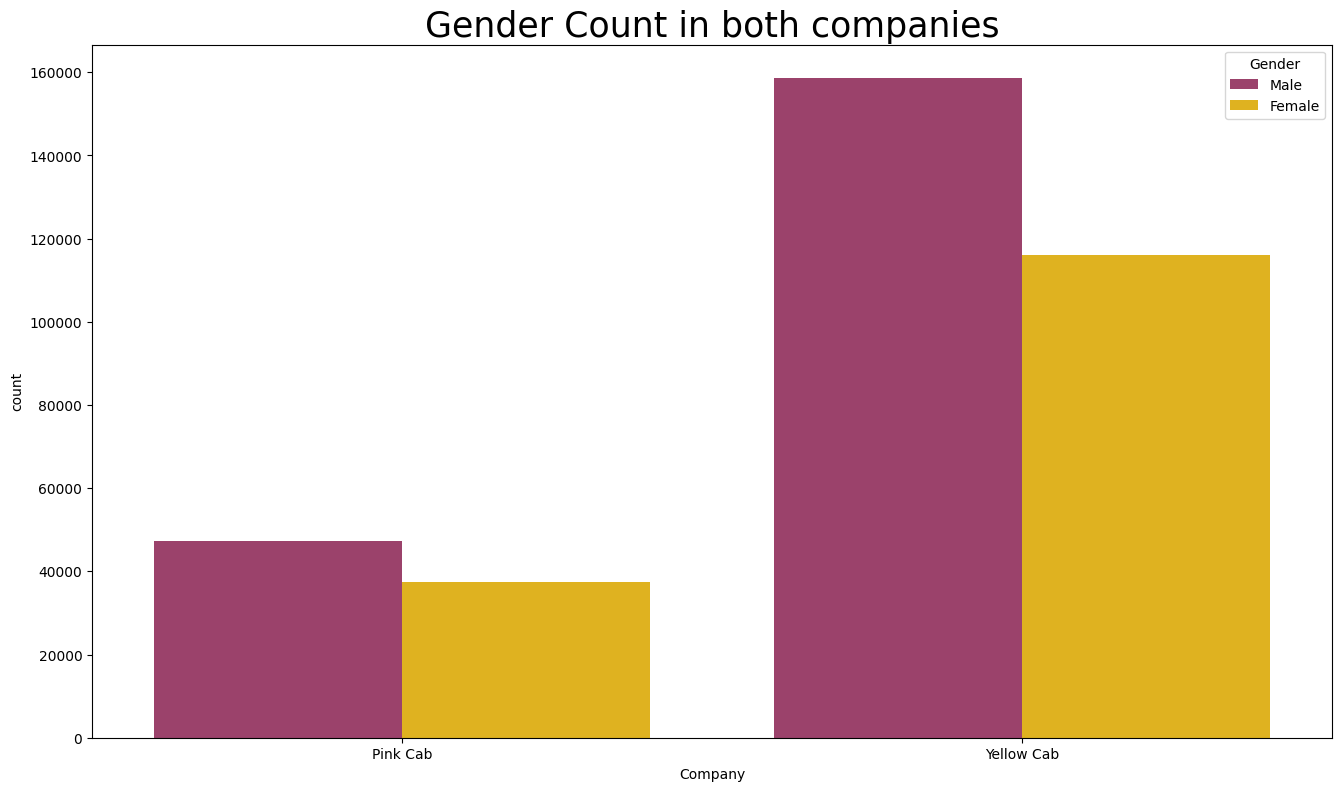

In [56]:
# comparing male and female travel frequency

plt.figure(figsize = (16, 9))
ax = sb.countplot(x="Company", hue="Gender", data=master_data, palette=['#AA336A', '#FFC300'])
plt.title('Gender Count in both companies', fontsize=25)
plt.show()

In both companies, males have travelled more compared to females

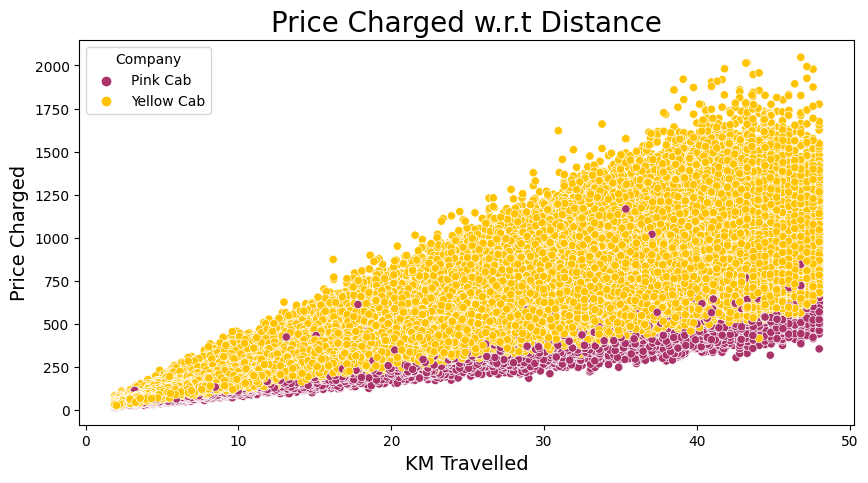

In [57]:
#comparing price charged with respect to distance 

plt.figure(figsize = (10, 5))

sb.scatterplot(data=master_data, x='KM Travelled', y='Price Charged', hue='Company', palette=['#AA336A', '#FFC300'])
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

The above scatter plot shows a linear relationship for between the price charged and the km travelled for both the companies

<AxesSubplot:>

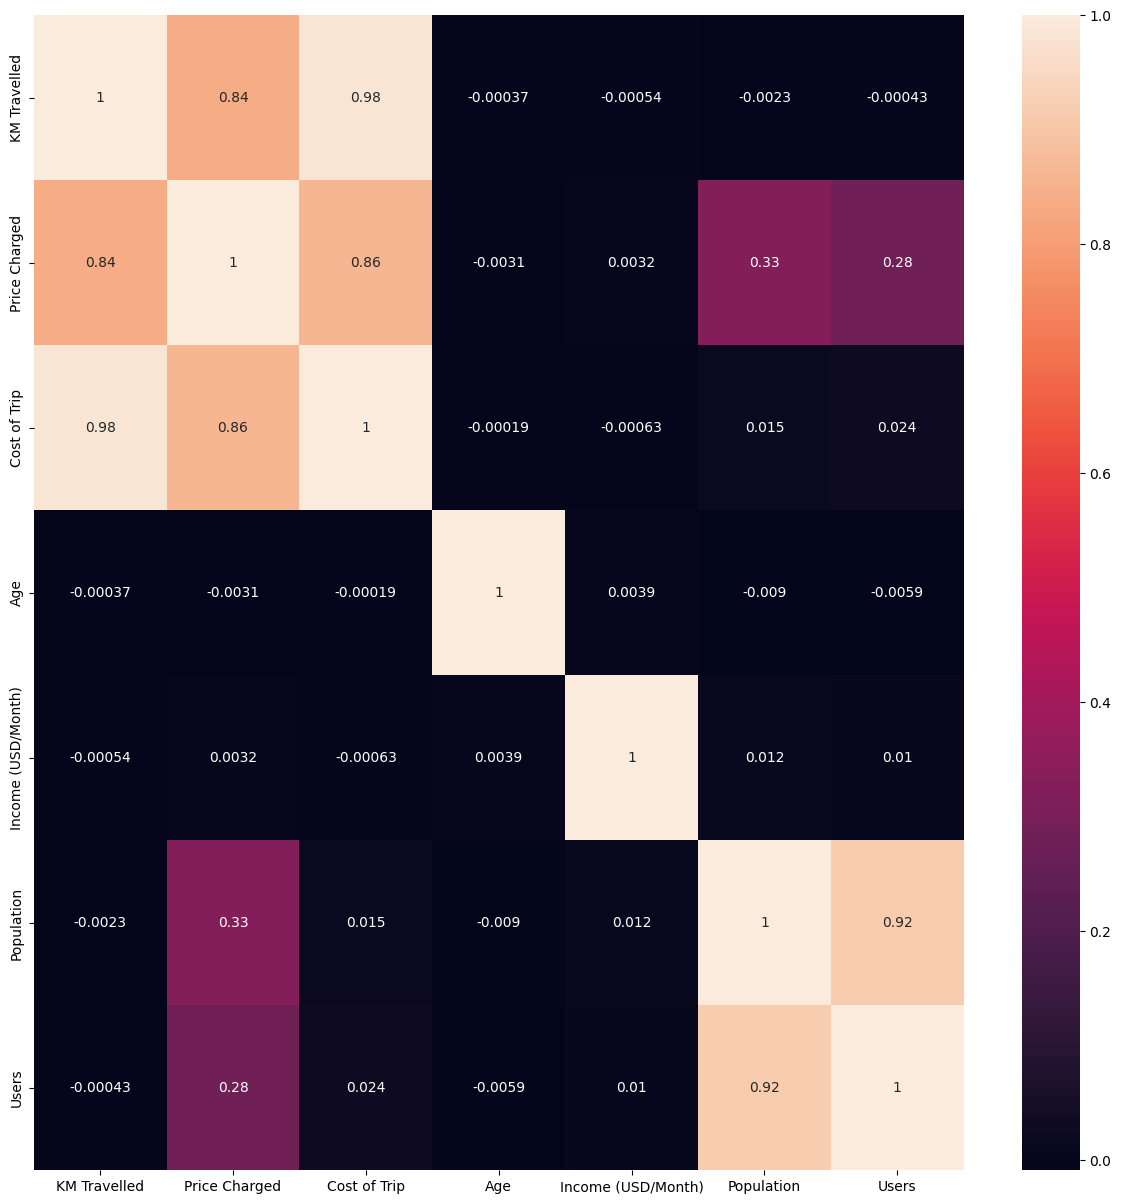

In [58]:
# To get idea about how much all the features are correlated with each other we create heatmap.

plt.figure(figsize=(15,15))
sb.heatmap(master_data[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']].corr(), color='b', annot=True)

From the above correlation matrix : 

1. KM Travelled has high correlation with cost of trip and Price Charged

2. Population and Users are also highly correlated

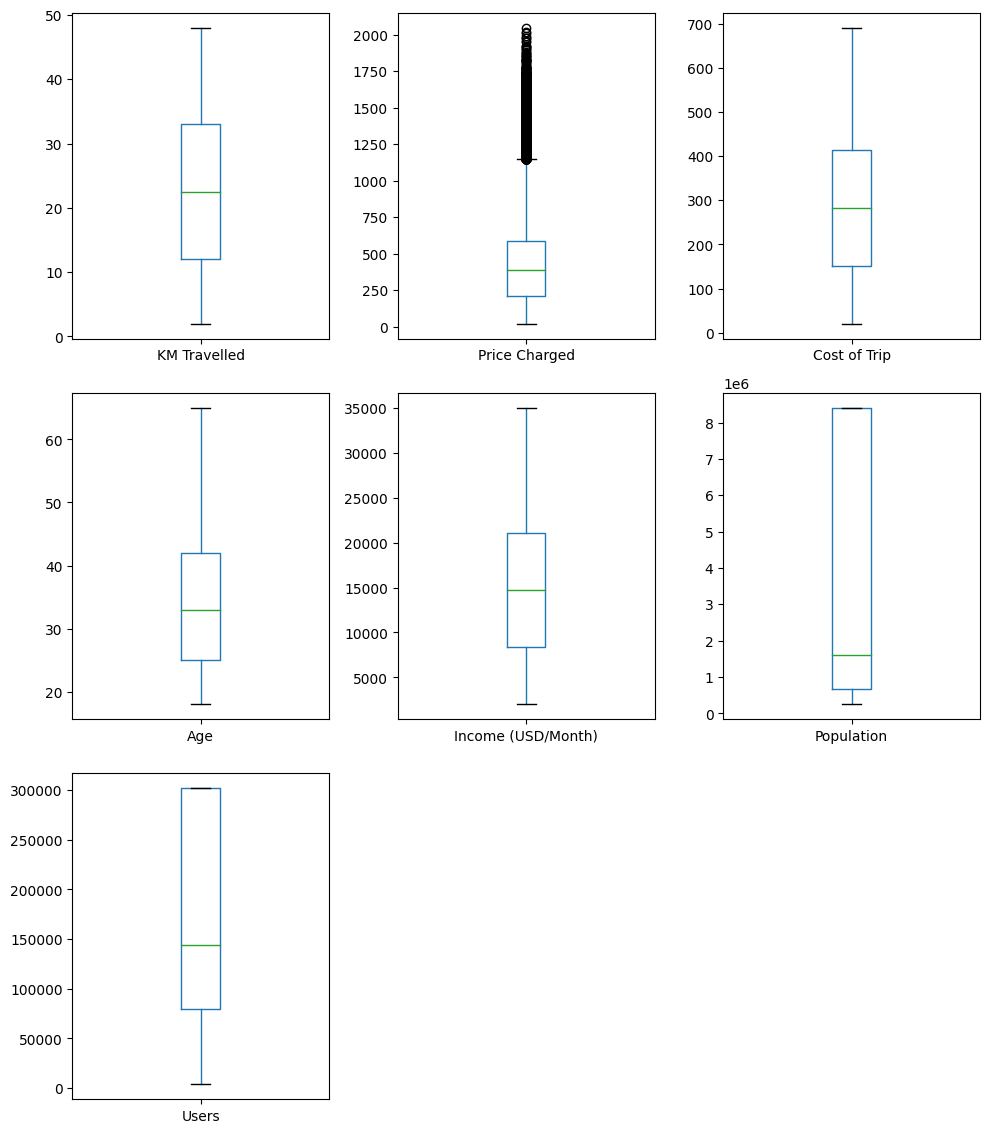

In [59]:
# To check the outliers we use boxplots.

master_data.columns.values
cols = ['KM Travelled', 'Price Charged', 'Cost of Trip',
        'Age', 'Income (USD/Month)',
       'Population', 'Users']

       
plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    master_data.boxplot(col)
    plt.grid()
    plt.tight_layout()

Price Charged has some outliers


In [60]:
# calculating the profit of each transaction

master_data['Profit'] = master_data['Price Charged'] -master_data['Cost of Trip']
master_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date of Travel1,Travel_year,Travel_month,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016-01-08,2016,1,57.3150
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018-07-21,2018,7,281.2772
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018-11-23,2018,11,194.6480
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016-01-06,2016,1,23.6660
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018-04-21,2018,4,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,2018-03-03,2018,3,143.6180
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,2018-04-13,2018,4,23.0464
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,2018-07-06,2018,7,-5.8540
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,2018-08-02,2018,8,-6.0900


<AxesSubplot:title={'center':' PROFIT PER COMPANY '}, ylabel='Profit'>

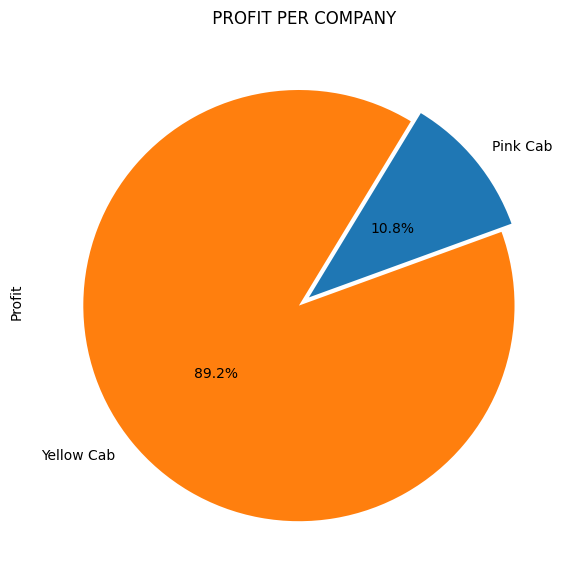

In [61]:
# Profit per company

plt.title(" PROFIT PER COMPANY ")
master_data.groupby('Company')['Profit'].sum().plot(kind='pie',y='Company',startangle=20,figsize=(15,7),autopct='%1.1f%%',explode=[0.03]*2,pctdistance=0.5)


Yellow cab made 89.2% of total profit

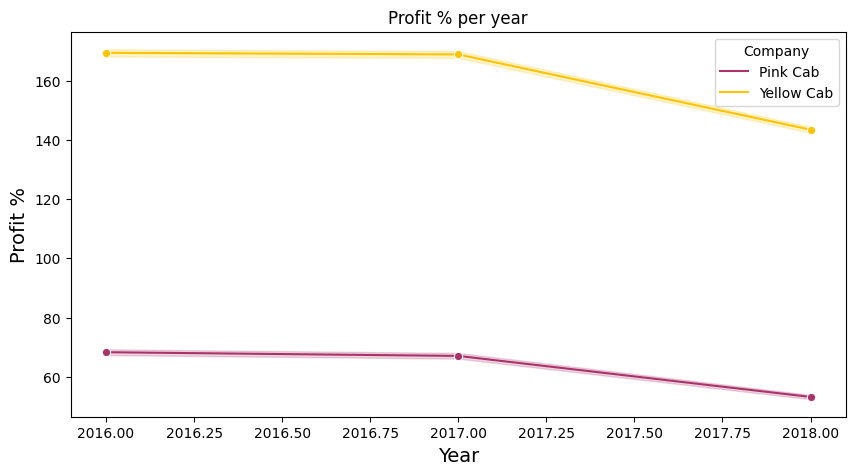

In [62]:
#profit per year

plt.figure(figsize = (10, 5))
sb.lineplot(x='Travel_year', y='Profit', hue="Company", data=master_data, marker='o', palette=['#AA336A', '#FFC300'])
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

From the above plot

1. Both companies have made better profit in 2016 compared to 2018

2. Compared to YELLOW cab, PINK cab has made better profit in the year 2018

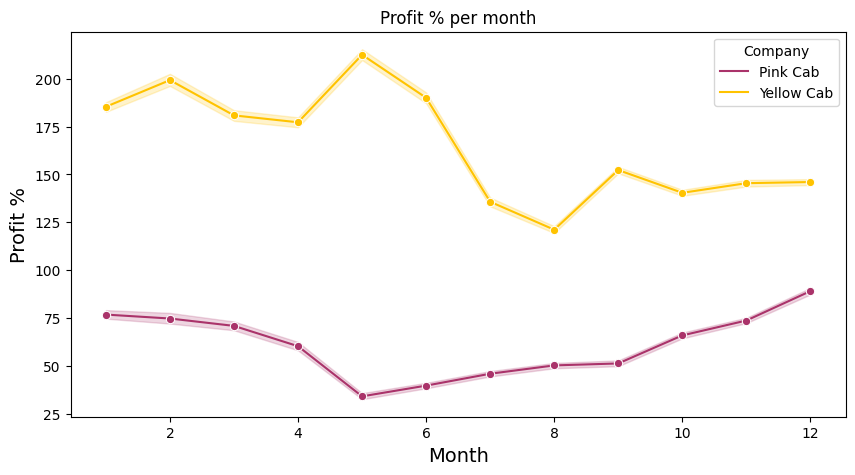

In [63]:
#profit per month

plt.figure(figsize = (10, 5))
sb.lineplot(x='Travel_month', y='Profit', hue="Company", data=master_data, marker='o', palette=['#AA336A', '#FFC300'])
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

1. YELLOW cab seems to have made profit during the mid of an year

2. PINK cab has made more profit during the year beginning and end

# HYPOTHESIS 

# HYPOTHESIS 1 : Is there any difference in Profit regarding age of users in both the cab companies?

# H0(Null hypothesis): There is no difference in profit regarding age in both the companies
# H1(Alternate Hypothesis): There is difference in profit regarding age in both the companies


In [64]:
#ttest is used in the below analysis for hypothesis testing

#HYPOTHESIS TESTING FOR YELLOW CAB COMPANY

val1 = master_data[(master_data['Age'] < 60)&(master_data['Company']=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
val2 = master_data[(master_data['Age'] >= 60)&(master_data['Company']=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

t_stat, p_val = stats.ttest_ind(val1.values, val2.values, equal_var=True)

print("P value is: ", p_val)

if(p_val < 0.05):
    print('There is difference in profit regarding age in Yellow company, therefore alternate (H1) hypothesis is selected')
else:
    print('There is no difference in profit regarding age in Yellow company, therefore null (H0) hypothesis is selected')

P value is:  7.618115793609195e-05
There is difference in profit regarding age in Yellow company, therefore alternate (H1) hypothesis is selected


In [65]:
#HYPOTHESIS TESTING FOR PINK CAB COMPANY

val1 = master_data[(master_data['Age'] < 60)&(master_data['Company']=='Pink Cab')].groupby('Transaction ID').Profit.mean()
val2 = master_data[(master_data['Age'] >= 60)&(master_data['Company']=='Pink Cab')].groupby('Transaction ID').Profit.mean()

t_stat, p_val = stats.ttest_ind(val1.values, val2.values, equal_var=True)

print("P value is: ", p_val)

if(p_val < 0.05):
    print('There is difference in profit regarding age in Pink company, therefore alternate (H1) hypothesis is selected')
else:
    print('There is no difference in profit regarding age in Pink company, therefore null (H0) hypothesis is selected')

P value is:  0.5029966906203471
There is no difference in profit regarding age in Pink company, therefore null (H0) hypothesis is selected


From the above analysis it is evident that yellow cab is providing some discount for people above the age of 60 

# HYPOTHESIS 2 : Is there any difference in Profit regarding mode of payment in both the cab companies?

# H0(Null hypothesis): There is no difference in profit regarding mode of payment in both the companies
# H1(Alternate Hypothesis): There is difference in profit regarding mode of payment in both the companies


In [66]:

#HYPOTHESIS 2 TESTING FOR YELLOW CAB COMPANY

val1 = master_data[(master_data['Payment_Mode']=='Cash')&(master_data['Company']=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
val2 = master_data[(master_data['Payment_Mode']=='Card')&(master_data['Company']=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

t_stat, p_val = stats.ttest_ind(val1.values, val2.values, equal_var=True)

print("P value is: ", p_val)

if(p_val < 0.05):
    print('There is difference in profit regarding mode of payment in Yellow company, therefore alternate (H1) hypothesis is selected')
else:
    print('There is no difference in profit regarding mode of payment in Yellow company, therefore null (H0) hypothesis is selected')

P value is:  0.2933060638298533
There is no difference in profit regarding mode of payment in Yellow company, therefore null (H0) hypothesis is selected


In [68]:

#HYPOTHESIS 2 TESTING FOR PINK CAB COMPANY

val1 = master_data[(master_data['Payment_Mode']=='Cash')&(master_data['Company']=='Pink Cab')].groupby('Transaction ID').Profit.mean()
val2 = master_data[(master_data['Payment_Mode']=='Card')&(master_data['Company']=='Pink Cab')].groupby('Transaction ID').Profit.mean()

t_stat, p_val = stats.ttest_ind(val1.values, val2.values, equal_var=True)

print("P value is: ", p_val)

if(p_val < 0.05):
    print('There is difference in profit regarding mode of payment in Pink company, therefore alternate (H1) hypothesis is selected')
else:
    print('There is no difference in profit regarding mode of payment in Pink company, therefore null (H0) hypothesis is selected')

P value is:  0.7900465828793288
There is no difference in profit regarding mode of payment in Pink company, therefore null (H0) hypothesis is selected


From the above analysis it is evident that there is no difference in profit regarding mode of payment in both the companies

# RECOMMENDATION ON CAB INVESTMENT 

# The following observations are made based on the over all analysis

# 1. Yellow cab owns 89% of the total profit made by both companies
# 2. Most Users prefer travelling with Yellow cab than Pink cab
# 3. Yellow cab charges higher than Pink cab


# Therefore I advice the XYZ company to invest in Yellow Cab company. 